In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
import seaborn as sns

In [55]:
mean_score1 = np.array([0.33451957, 0.3313783 , 0.39800995, 0.26182965, 0.37799043,
                        0.39810427, 0.33234421, 0.24537037, 0.40289855, 0.39914163])
mean_score2 = np.array([0.68683274, 0.80351906, 0.61691542, 0.6214511 , 0.52631579,
                        0.68720379, 0.57566766, 0.61574074, 0.74492754, 0.72961373])
mean_score3 = np.array([0.48704663, 0.41240876, 0.64516129, 0.4213198 , 0.71818182,
                        0.57931034, 0.57731959, 0.39849624, 0.54085603, 0.54705882])

mean_mat = np.vstack((mean_score1,mean_score2,mean_score3))
mean_overall = np.mean(mean_mat, axis = 0)

In [26]:
mean_score1_hpss = np.array([0.34519573, 0.32844575, 0.40298507, 0.24290221, 0.36363636, 
                             0.36492891, 0.33234421, 0.24537037, 0.3884058 , 0.39914163])
mean_score2_hpss = np.array([0.68683274, 0.80938416, 0.61691542, 0.62460568, 0.52631579,
                             0.68720379, 0.57566766, 0.61574074, 0.74492754, 0.72103004])
mean_score3_hpss = np.array([0.50259067, 0.4057971 , 0.65322581, 0.38888889, 0.69090909,
                             0.53103448, 0.57731959, 0.39849624, 0.52140078, 0.55357143])

mean_mat_hpss = np.vstack((mean_score1_hpss,mean_score2_hpss,mean_score3_hpss))
mean_overall_hpss = np.mean(mean_mat_hpss, axis = 0)

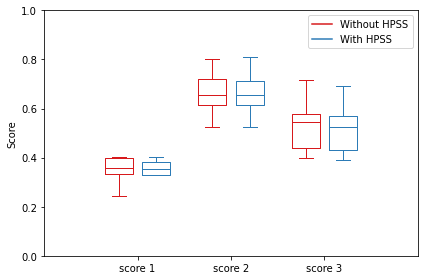

In [69]:
data_a = [mean_score1, mean_score2, mean_score3]
data_b = [mean_score1_hpss, mean_score2_hpss, mean_score3_hpss]

ticks = ['score 1', 'score 2', 'score 3']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
plt.figure()
bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Without HPSS')
plt.plot([], c='#2C7BB6', label='With HPSS')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.tight_layout()

plt.savefig('score_boxplot.png')

In [28]:
stat, p = ttest_ind(mean_score3, mean_score3_hpss)
print('t = %.3f, p = %.3f' % (stat, p))
if p > 0.05:
	display('Probably the same distribution')
else:
	display('Probably different distributions')

t = 0.223, p = 0.826


'Probably the same distribution'

In [29]:
stat, p = ttest_ind(mean_overall, mean_overall_hpss)
print('t = %.3f, p = %.3f' % (stat, p))
if p > 0.05:
	display('Probably the same distribution')
else:
	display('Probably different distributions')

t = 0.249, p = 0.806


'Probably the same distribution'

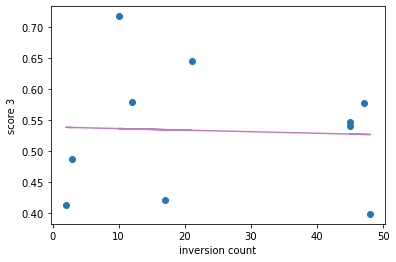

In [68]:
inversion_count = np.array([3, 2, 21, 17, 10, 12, 47, 48, 45, 45])

fig = plt.figure()

plt.scatter(inversion_count,mean_score3)
m,b = np.polyfit(inversion_count, mean_score3,1)
plt.plot(inversion_count, m * inversion_count + b, color = [0.5, 0, 0.5], alpha = 0.5)
plt.xlabel('inversion count')
plt.ylabel('score 3')

plt.savefig('score_inversion_correlation.png')

In [71]:
from scipy.stats import pearsonr
corr, p = pearsonr(inversion_count, mean_score3)
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % p)

Pearsons correlation: -0.046
p-value: 0.899


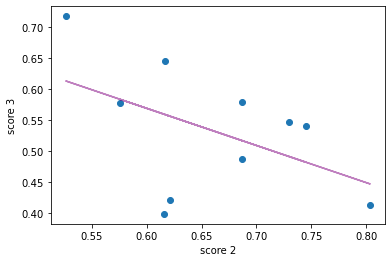

In [66]:
fig = plt.figure()

plt.scatter(mean_score2,mean_score3)
m,b = np.polyfit(mean_score2, mean_score3,1)
plt.plot(mean_score2, m * mean_score2 + b, color = [0.5, 0, 0.5], alpha = 0.5)
plt.xlabel('score 2')
plt.ylabel('score 3')

plt.show()